Primeros datos de log DPI:
0    3.298984
1    3.305373
2    3.310757
3    3.310736
4    3.316788
Name: DPI, dtype: float64

Prueba ADF:
Estadístico: -1.4407, p-valor: 0.5626
Interpretación: No estacionaria

Prueba KPSS:
Estadístico: 1.5566, p-valor: 0.0100
Interpretación: No estacionaria


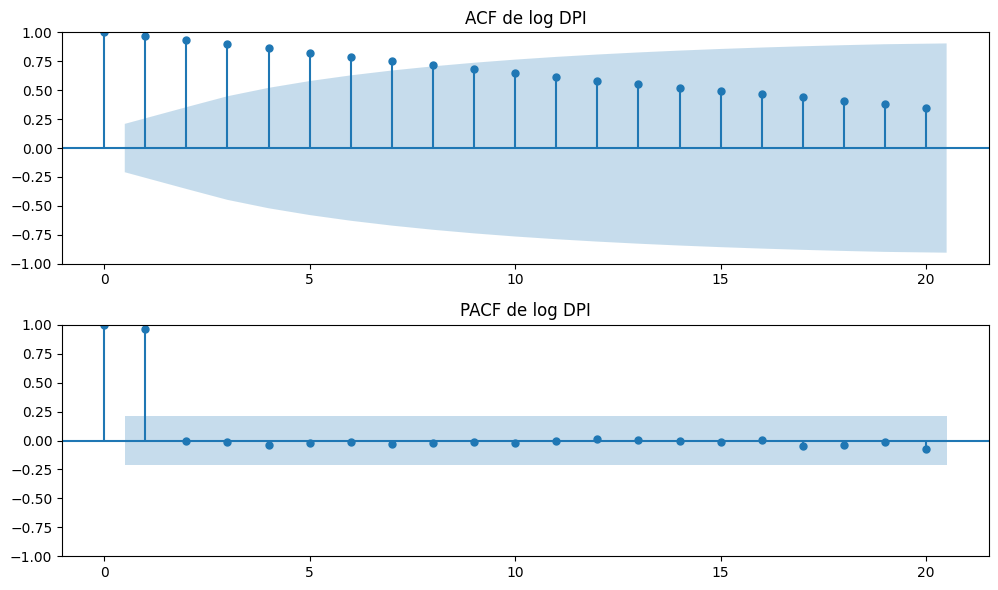


Mejor modelo ARIMA según AIC:
Orden (p,d,q): (1, 1, 1), AIC: -680.33

Resumen del modelo ARIMA:
                               SARIMAX Results                                
Dep. Variable:                    DPI   No. Observations:                   88
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 343.163
Date:                Mon, 03 Nov 2025   AIC                           -680.326
Time:                        01:42:34   BIC                           -672.928
Sample:                             0   HQIC                          -677.347
                                 - 88                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9997      0.004    234.237      0.000       0.991       1.008
ma.L1         -0.9852      0.120  

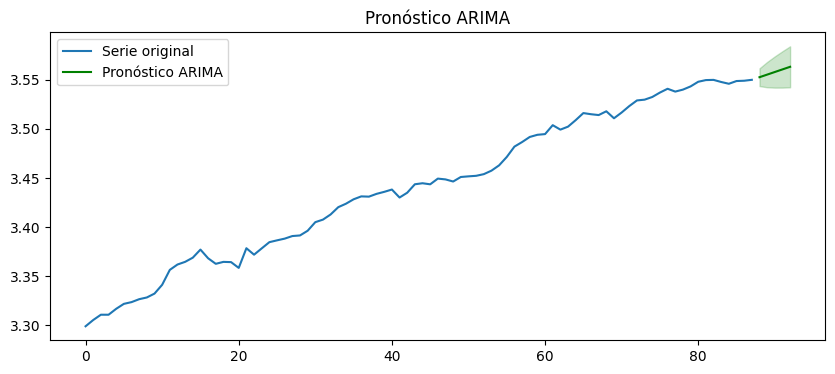


Resumen del modelo ARMA:
                               SARIMAX Results                                
Dep. Variable:                    DPI   No. Observations:                   88
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 331.005
Date:                Mon, 03 Nov 2025   AIC                           -654.010
Time:                        01:42:34   BIC                           -644.101
Sample:                             0   HQIC                          -650.018
                                 - 88                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4408      0.064     53.864      0.000       3.316       3.566
ar.L1          0.9906      0.010    102.466      0.000       0.972       1.010
ma.L1          0.1767     

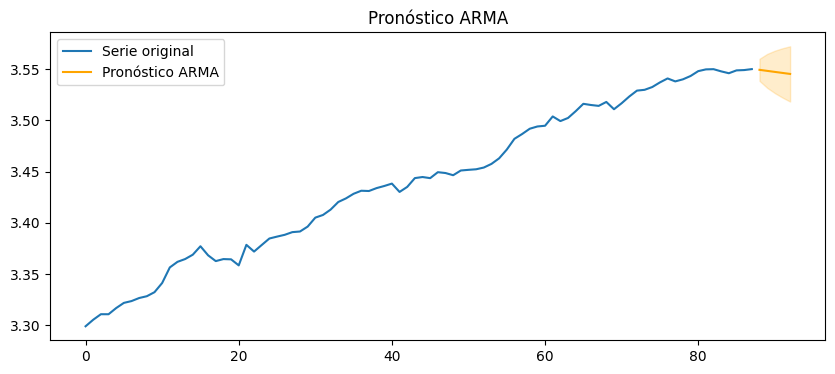


Comparación de modelos:
ARIMA AIC: -680.33, BIC: -672.93
ARMA AIC: -654.01, BIC: -644.10


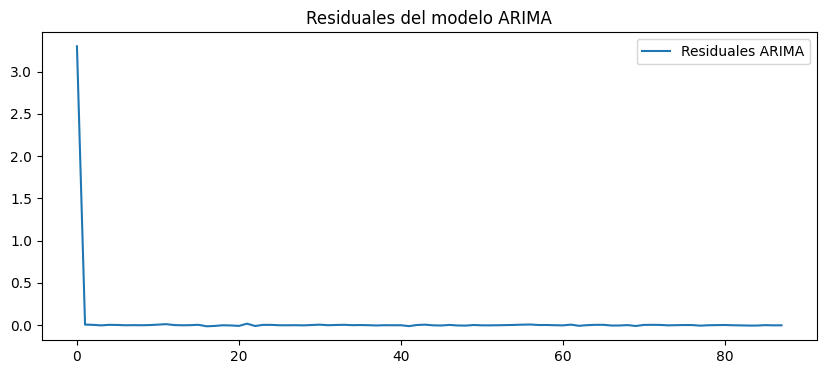

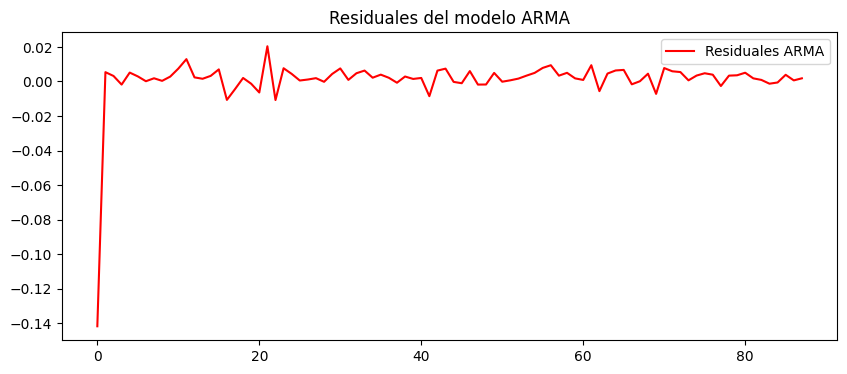


Prueba de normalidad Anderson-Darling:
ARIMA: estadístico=inf, p-valor=0.0000
ARMA: estadístico=16.9238, p-valor=0.0000

Interpretación del pronóstico:
Primeros 5 valores pronosticados por ARIMA:
88    3.552574
89    3.555226
90    3.557877
91    3.560526
92    3.563176
Name: predicted_mean, dtype: float64

Primeros 5 valores pronosticados por ARMA:
88    3.549224
89    3.548209
90    3.547203
91    3.546207
92    3.545220
Name: predicted_mean, dtype: float64


In [1]:
# 1. Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

# 2. Leer archivo Excel
file_path = "/content/sample_data/prob18.xlsx"
df = pd.read_excel(file_path, sheet_name="DPI", engine="openpyxl")
series = df['DPI'].dropna()

# 3. Mostrar primeros datos
print("Primeros datos de log DPI:")
print(series.head())

# 4. Pruebas de raíz unitaria
adf_result = adfuller(series)
print("\nPrueba ADF:")
print(f"Estadístico: {adf_result[0]:.4f}, p-valor: {adf_result[1]:.4f}")
print("Interpretación:", "Estacionaria" if adf_result[1] < 0.05 else "No estacionaria")

kpss_result = kpss(series, regression='c', nlags='auto')
print("\nPrueba KPSS:")
print(f"Estadístico: {kpss_result[0]:.4f}, p-valor: {kpss_result[1]:.4f}")
print("Interpretación:", "No estacionaria" if kpss_result[1] < 0.05 else "Estacionaria")

# 5. ACF y PACF
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
plot_acf(series, ax=ax[0], lags=20)
ax[0].set_title("ACF de log DPI")
plot_pacf(series, ax=ax[1], lags=20)
ax[1].set_title("PACF de log DPI")
plt.tight_layout()
plt.show()

# 6. Selección de modelo ARIMA usando AIC
best_aic = np.inf
best_order = None
best_model = None
for p in range(4):
    for d in range(2):
        for q in range(4):
            try:
                model = ARIMA(series, order=(p,d,q)).fit()
                if model.aic < best_aic:
                    best_aic = model.aic
                    best_order = (p,d,q)
                    best_model = model
            except:
                continue
print("\nMejor modelo ARIMA según AIC:")
print(f"Orden (p,d,q): {best_order}, AIC: {best_aic:.2f}")

# 7. Ajuste del modelo ARIMA
print("\nResumen del modelo ARIMA:")
print(best_model.summary())
forecast_arima = best_model.get_forecast(steps=5)
conf_int_arima = forecast_arima.conf_int()
forecast_values_arima = forecast_arima.predicted_mean

plt.figure(figsize=(10,4))
plt.plot(series, label="Serie original")
plt.plot(forecast_values_arima, label="Pronóstico ARIMA", color='green')
plt.fill_between(conf_int_arima.index, conf_int_arima.iloc[:,0], conf_int_arima.iloc[:,1], color='green', alpha=0.2)
plt.title("Pronóstico ARIMA")
plt.legend()
plt.show()

# 8. Ajuste modelo ARMA (d=0)
arma_model = ARIMA(series, order=(best_order[0], 0, best_order[2])).fit()
print("\nResumen del modelo ARMA:")
print(arma_model.summary())
forecast_arma = arma_model.get_forecast(steps=5)
conf_int_arma = forecast_arma.conf_int()
forecast_values_arma = forecast_arma.predicted_mean

plt.figure(figsize=(10,4))
plt.plot(series, label="Serie original")
plt.plot(forecast_values_arma, label="Pronóstico ARMA", color='orange')
plt.fill_between(conf_int_arma.index, conf_int_arma.iloc[:,0], conf_int_arma.iloc[:,1], color='orange', alpha=0.2)
plt.title("Pronóstico ARMA")
plt.legend()
plt.show()

# 9. Comparación de modelos
print("\nComparación de modelos:")
print(f"ARIMA AIC: {best_model.aic:.2f}, BIC: {best_model.bic:.2f}")
print(f"ARMA AIC: {arma_model.aic:.2f}, BIC: {arma_model.bic:.2f}")

# 10. Análisis de residuales
res_arima = best_model.resid
res_arma = arma_model.resid

plt.figure(figsize=(10,4))
plt.plot(res_arima, label="Residuales ARIMA")
plt.title("Residuales del modelo ARIMA")
plt.legend()
plt.show()

plt.figure(figsize=(10,4))
plt.plot(res_arma, label="Residuales ARMA", color='red')
plt.title("Residuales del modelo ARMA")
plt.legend()
plt.show()

norm_arima = normal_ad(res_arima)
norm_arma = normal_ad(res_arma)
print("\nPrueba de normalidad Anderson-Darling:")
print(f"ARIMA: estadístico={norm_arima[0]:.4f}, p-valor={norm_arima[1]:.4f}")
print(f"ARMA: estadístico={norm_arma[0]:.4f}, p-valor={norm_arma[1]:.4f}")

# 11. Interpretación del pronóstico
print("\nInterpretación del pronóstico:")
print("Primeros 5 valores pronosticados por ARIMA:")
print(forecast_values_arima.head())
print("\nPrimeros 5 valores pronosticados por ARMA:")
print(forecast_values_arma.head())